# Expedia Hotel Recommendation Classification




# Preprocessing
Processing the raw datastes into applicable format for building machine learning model. 
- ### Explore data analysis
  
  Analyzing data sets to summarize their main characteristics, often with visual methods.
  
- ### Data Cleaning 
  
    Data cleaning is the process of cleaning / standardising the data to make it ready for analysis. Most of times,   there will be discrepancies in the captured data such as incorrect data formats, missing data, errors while capturing the data. This is an important step in any given data science project because the accuracy of the results depends heavily on the data we use.

- ### Feature Engineering
    
    Selecting features with more informations,or creating new features which helps analysis.




## Import  Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas as pd
import boto3
from io import StringIO
import io
import string
import random
import json
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Any results you write to the current directory are saved as output.

['destinations.csv', 'sample_submission.csv', 'train.csv', 'test.csv']


### Dataset

- Dataset 2013-1014 time frame
- Train Data: 37 million entires
- Test Data: 2.5 million entries

In [3]:
# Load train data
train = pd.read_csv('../input/train.csv', nrows=100000)

# Load test data
test = pd.read_csv('../input/test.csv', nrows=100000)

# Load destination data
destination = pd.read_csv('../input/destinations.csv', nrows=100000)

In [4]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [5]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63078 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99929 non-null object
srch_co                      99929 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int64
srch_destination_type

#### Features

|  Feature |  Description | 
|----------|:---------|
| date_time  | Timestamp     |
| site_name | ID of Expedia point of sale|
| posa_continent | ID of site’s continent |
| user_location_country |ID of customer’s country |
| user_location_region|ID of customer’s region |
| user_location_city| ID of customer’s city|
| orig_destination_distance| Physical distance between a hotel and a customer|
| user_id| ID of user|
| is_mobile| 1 for mobile device, 0 otherwise|
| is_package| 1 if booking/click was part of package, 0 otherwise|
| channel| ID of a marketing channel|
| srch_ci| Check-in date|
| srch_co| Check-out date|
| srch_adults_cnt| Number of adults|
| srch_children_cnt| Number of children|
| srch_rm_cnt| Number of rooms|
| srch_destination_id| ID of the destination|
| srch_destination_type_id| Type of destination|
| is_booking | 1 if a booking, 0 if a click|
| cnt| Number of similar events in the context of the same user sessiont|
| hotel_continent| Hotel continent|
| hotel_country| Hotel country|
| hotel_market| Hotel market|
| hotel_cluster| ID of hotel cluster|


## Steps

first step was to clean and pre-process the data and perform exploratory analysis to get some interesting insights into the process of choosing a hotel.

- Remove the users who did not booked the hotel
- Identify the searches by each user belonging to a specific type of destination
- orig_destination_distance contains Nan values
- The  check-in  and  check-out  dates  to find the duration of the stay for each of the entries in the training set.



In [7]:
# Check the percentage of Null value in the dataset
total = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/len(train)).sort_values(ascending=False)
missing_data = pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])
missing_data.head(20)

,Total,Percentage
orig_destination_distance,36922,0.36922
srch_ci,71,0.00071
srch_co,71,0.00071
channel,0,0.00000
site_name,0,0.00000
posa_continent,0,0.00000
user_location_country,0,0.00000
user_location_region,0,0.00000
user_location_city,0,0.00000
user_id,0,0.00000


#### The origin destination distance has an 36.9% null value.
#### Check in and out have 0.071% null value.

## Visualization of Data


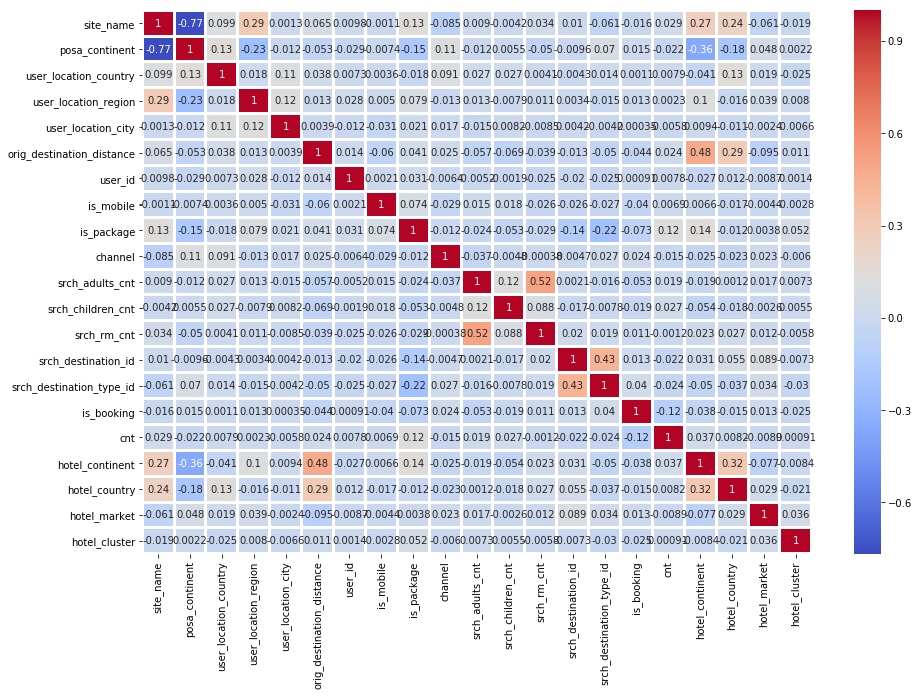

In [7]:
plt.figure(figsize=(15, 10))

sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=2)

plt.show()

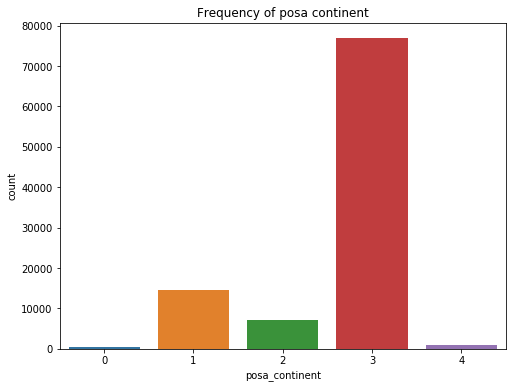

In [8]:
# Frequency of posa continent
plt.figure(figsize = (8,6))

sns.countplot('posa_continent', data=train)

plt.title('Frequency of posa continent')
plt.show()

Most of bookings are from continent 3 site name, some are from continent 1 and 2, but 1 and 2 have a huge gap with continent 3.

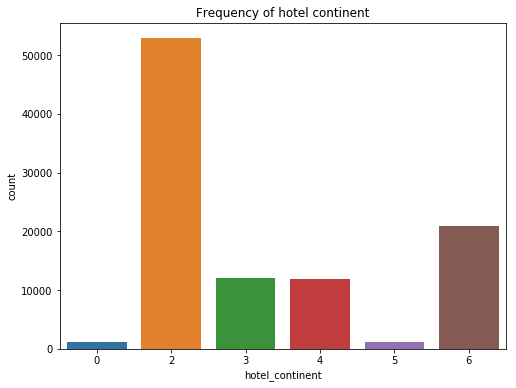

In [9]:
# Frequency of hotel continent
plt.figure(figsize = (8,6))

sns.countplot('hotel_continent', data=train)

plt.title('Frequency of hotel continent')
plt.show()

Differing from the booking site, the hotel continent indicates that most hotels are situated in continents 2, 3, 4, and 6. Continent 2 is a popular destination, while continent 3 is known for outbound travel.

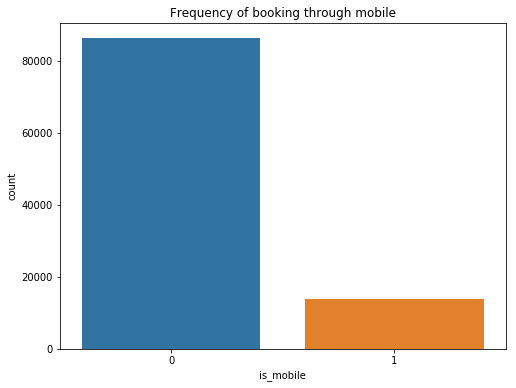

In [10]:
# Frequency of booking through mobile
plt.figure(figsize = (8,6))

sns.countplot('is_mobile', data=train)

plt.title('Frequency of booking through mobile')
plt.show()

In [11]:
# Calculate proportions directly using value_counts
proportions = train['is_mobile'].value_counts(normalize=True)

# Create DataFrame from proportions
booking_through_mobile = pd.DataFrame(proportions).rename(columns={'is_mobile': 'Proportion'})
booking_through_mobile.index = ['Not Mobile','Mobile']

booking_through_mobile


,Proportion
Not Mobile,0.86197
Mobile,0.13803


86% customers are booking via other than their mobile, only 13% customers are booking through their mobile.

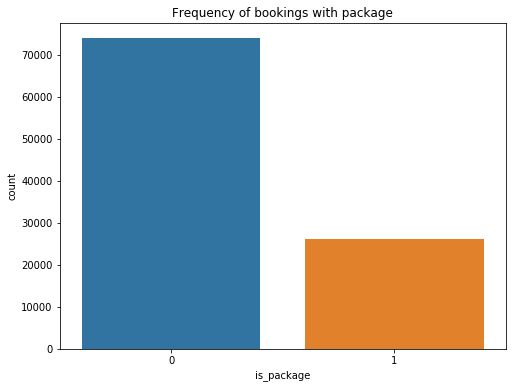

In [12]:
# frequency of bookings with package
plt.figure(figsize = (8,6))
sns.countplot('is_package', data=train)

plt.title('Frequency of bookings with package')
plt.show()

In [13]:
# Calculate proportions directly using value_counts
proportions_package = train['is_package'].value_counts(normalize=True)

# Create DataFrame from proportions
booking_with_package = pd.DataFrame(proportions_package).rename(columns={'is_package': 'Proportion_package'})
booking_with_package.index = ['Not Package','Package']

booking_with_package

,Proportion_package
Not Package,0.73953
Package,0.26047


74% customers are booking hotel and flight seperately (not package), only 26% customers are booking with package.

## Data Clean and Feature Engineering

### Convert it into numerical values which will be relevant to our model.
- date_time
- srch_ci
- srch_co




## Add Extra features
Extract relevant information from date columns
### Additional attributes
- stay_dur: number of duration of stay
- no_of_days_bet_booking: number of days between the booking and 
- Cin_day: Check-in day
- Cin_month: Check-in month
- Cin_year: Check-out year

In [8]:
train['srch_ci'] = pd.to_datetime(train['srch_ci'])
train['srch_co'] = pd.to_datetime(train['srch_co'])
train['date_time'] = pd.to_datetime(train['date_time'])
train['stay_dur'] = (train['srch_co'] - train['srch_ci']).astype('timedelta64[D]')
train['no_of_days_bet_booking'] = (train['srch_ci'] - train['date_time']).astype('timedelta64[D]')
    
# For hotel check-in
# Month, Year, Day
train['Cin_day'] = train["srch_ci"].apply(lambda x: x.day)
train['Cin_month'] = train["srch_ci"].apply(lambda x: x.month)
train['Cin_year'] = train["srch_ci"].apply(lambda x: x.year)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
date_time                    100000 non-null datetime64[ns]
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63078 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99929 non-null datetime64[ns]
srch_co                      99929 non-null datetime64[ns]
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int

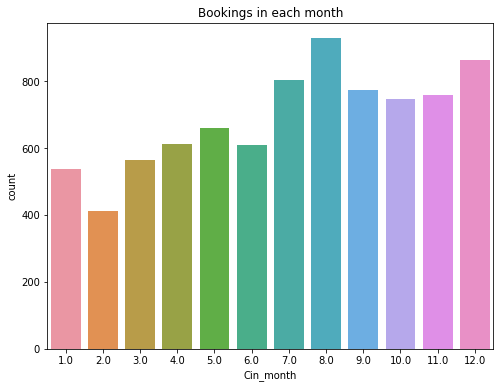

In [16]:
# Count the bookings in each month
plt.figure(figsize = (8,6))

sns.countplot('Cin_month', data=train[train["is_booking"] == 1])

plt.title('Bookings in each month')
plt.show()

The booking trend fluctuates with the holidays, with peak seasons occurring in July, August, and December.

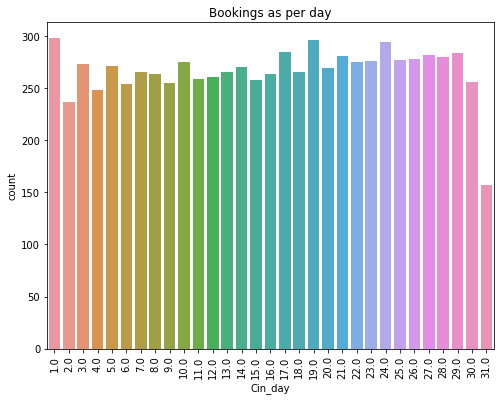

In [17]:
# Count the bookings as per day
plt.figure(figsize = (8,6))

sns.countplot('Cin_day', data=train[train["is_booking"] == 1])

plt.title('Bookings as per day')
plt.xticks(rotation=90)
plt.show()

Throughout the month, the trend remains relatively consistent, though the first day experiences the highest number of bookings, while the last day sees the fewest.

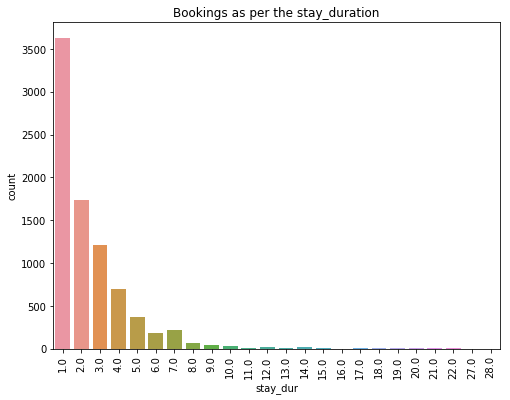

In [18]:
# Count the bookings as per the stay_duration
plt.figure(figsize = (8,6))

sns.countplot('stay_dur', data=train[train["is_booking"] == 1])

plt.title('Bookings as per the stay_duration')
plt.xticks(rotation=90)
plt.show()

Stay duration shows that staying one night is most people choice. One night stay duration could be excursion or business trip.

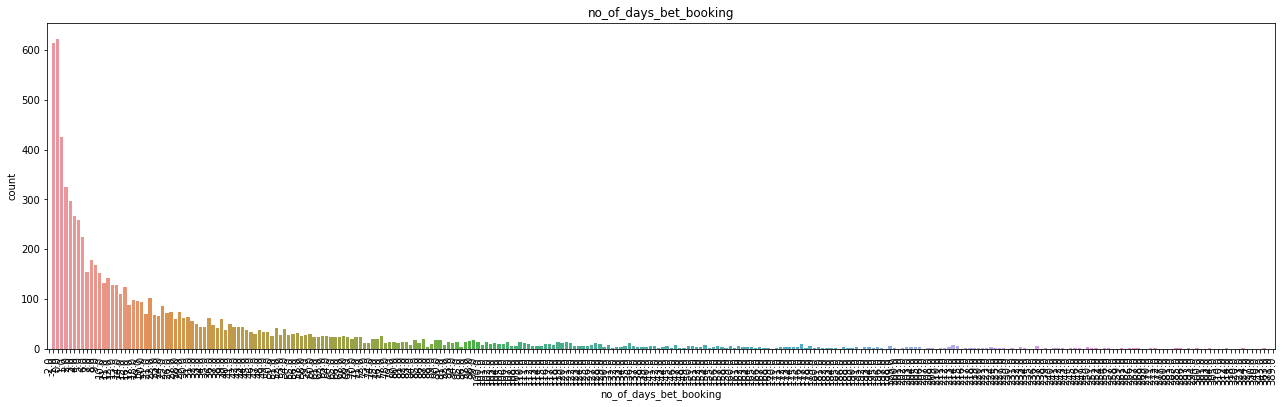

In [19]:
# Count the bookings as per the stay_duration
plt.figure(figsize = (22,6))

sns.countplot('no_of_days_bet_booking', data=train[train["is_booking"] == 1])

plt.title('no_of_days_bet_booking')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Check the percentage of Null value in the dataset
total = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/len(train)).sort_values(ascending=False)
missing_data = pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])
missing_data.head(20)

,Total,Percentage
orig_destination_distance,36922,0.36922
Cin_year,71,0.00071
srch_ci,71,0.00071
Cin_month,71,0.00071
srch_co,71,0.00071
stay_dur,71,0.00071
no_of_days_bet_booking,71,0.00071
Cin_day,71,0.00071
site_name,0,0.00000
posa_continent,0,0.00000


### Fill nan with the day which has max occurence in datasets


In [21]:
most_popular_checkin_date = train['Cin_day'].value_counts().idxmax()
most_popular_checkin_date

26.0

In [22]:
most_popular_checkin_month = train['Cin_month'].value_counts().idxmax()
most_popular_checkin_month

12.0

In [23]:
most_popular_checkin_year = train['Cin_year'].value_counts().idxmax()
most_popular_checkin_year

2014.0

In [24]:
most_popular_stayduration = train['stay_dur'].value_counts().idxmax()
most_popular_stayduration

1.0

In [25]:
most_popular_no_of_days_bet_booking = train['no_of_days_bet_booking'].value_counts().idxmax()
most_popular_no_of_days_bet_booking

0.0

In [11]:
train['Cin_day'] = train['Cin_day'].fillna(26.0)
train['Cin_month'] = train['Cin_month'].fillna(8.0)
train['Cin_year'] = train['Cin_year'].fillna(2014.0)
train['stay_dur'] = train['stay_dur'].fillna(1.0)
train['no_of_days_bet_booking'] = train['no_of_days_bet_booking'].fillna(0.0)

In [12]:
# Fill average values in place for nan, fill with mean
train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)

In [13]:
#Remove datetime object from the dataset
#columns to remove
user_id = train['user_id']
columns = ['date_time', 'srch_ci', 'srch_co','user_id','srch_destination_type_id','srch_destination_id']
train.drop(columns=columns,axis=1,inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    100000 non-null float64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
is_booking                   100000 non-null int64
cnt                          100000 non-null int64
hotel_continent              100000 non-null int64
hotel_country                100000 non-null int64
hotel_market                 100000 non-null int64
hotel_cluster        

### Create a Pipeline to Normalize and Encoded dataset

In [14]:
#  Create a pipeline to standardize, normalize and one hot encoded train dataset
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [15]:
# Update categorical and numerical columns
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns


# Numerical columns for standardization
numerical_columns = ['orig_destination_distance', 'stay_dur', 'no_of_days_bet_booking', 'Cin_day', 'Cin_month', 'Cin_year','srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Categorical columns for one-hot encoding
categorical_columns = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'channel', 'hotel_continent', 'hotel_country', 'hotel_market']


# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to dataset
X = train.drop('is_booking', axis=1)
y = train['is_booking']
X = pipeline.fit_transform(X)


In [32]:
train.shape

# We have 23 features 

(100000, 23)

We have preprocessed our data and it is ready to fit into the model.
All the object values are converted into numerical values. Also, we have more insights of the data.

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_preprocessed and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define the model
rfc = RandomForestClassifier(n_estimators=20, min_samples_split=4, min_samples_leaf=2, random_state=42, verbose=1)

score_rfc_cv = cross_val_score(rfc, X_train, y_train, cv=5, verbose=1)

rfc.fit(X_train, y_train) 
score_rfc_test = rfc.score(X_test, y_test)

print("Cross-validation scores:", score_rfc_cv)
print("Mean CV score:", score_rfc_cv.mean())
print("Test set score:", score_rfc_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.4s finished
[Parall

Cross-validation scores: [0.91738016 0.9174375  0.9171875  0.917375   0.91699481]
Mean CV score: 0.9172749951831054
Test set score: 0.9158


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.9s finished


In [34]:
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=2, random_state=42, verbose=1)
score_rfc_cv = cross_val_score(rfc, X_train, y_train, cv=5, verbose=1)

rfc.fit(X_train, y_train) 
score_rfc_test = rfc.score(X_test, y_test) 
print("Cross-validation scores:", score_rfc_cv)
print("Mean CV score:", score_rfc_cv.mean())
print("Test set score:", score_rfc_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parall

Cross-validation scores: [0.91750516 0.91725    0.9174375  0.9175     0.91705732]
Mean CV score: 0.9173499944020019
Test set score: 0.9161


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.1s finished
[Parall

Best average cross-validation score: 0.9173499951832031
Best n_estimators: 3


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 23.0min finished


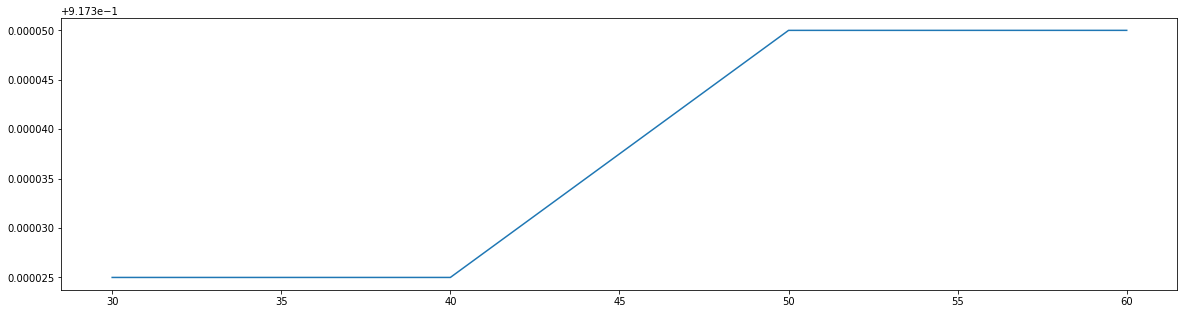

In [36]:
# Find the best n_estimators
scoreL = []
for i in range(30,61,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 min_samples_split=4,
                                 min_samples_leaf=2,
                                 verbose=1,
                                 random_state=42)
    score = cross_val_score(rfc, X_train, y_train, cv=5, verbose=1).mean()
    scoreL.append(score)
    

print(f"Best average cross-validation score: {max(scoreL)}")
print(f"Best n_estimators: {scoreL.index(max(scoreL))}")

plt.figure(figsize=[20,5])
plt.plot(range(30,61,10),scoreL)
plt.show()

In [50]:
# Find best max_depth

param_grid = {'max_depth':np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=2, random_state=42, verbose=1)
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train, y_train)

GS.best_params_

GS.best_score_

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paralle

0.917575

In [51]:
GS.best_params_

{'max_depth': 1}

In [17]:
# Find best max_features

param_grid = {'max_features': np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=50, max_depth=1, min_samples_split=4, min_samples_leaf=2, random_state=42)

GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train, y_train)

GS.best_params_


{'max_features': 5}

In [18]:
GS.best_score_

0.917575

In [24]:
# Find best min_samples_leaf

param_grid = {'min_samples_leaf':np.arange(1,1+20,1)}

rfc = RandomForestClassifier(n_estimators=50, max_depth=1, max_features=5, min_samples_split=4, random_state=42)

GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train, y_train)

GS.best_params_

{'min_samples_leaf': 1}

In [25]:
GS.best_score_

0.917575

In [27]:
# Find best min_samples_split

param_grid = {'min_samples_split':np.arange(2,2+20,1)}

rfc = RandomForestClassifier(n_estimators=50, max_depth=1, max_features=5, min_samples_leaf=1, random_state=42)

GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train, y_train)

GS.best_params_

{'min_samples_split': 2}

In [28]:
GS.best_score_

0.917575

In [29]:
# Find best criterion

param_grid = {'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=50, max_depth=1, max_features=5, min_samples_leaf=1,min_samples_split=2, random_state=42)

GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train, y_train)

GS.best_params_

{'criterion': 'gini'}

In [30]:
GS.best_score_

0.917575

In [31]:
# Finalize the model based on GridSearch result
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=1, max_features=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

score_rfc_cv = cross_val_score(rfc, X_train, y_train, cv=5)

rfc.fit(X_train, y_train) 
score_rfc_test = rfc.score(X_test, y_test) 

print("Cross-validation scores:", score_rfc_cv)
print("Mean CV score:", score_rfc_cv.mean())
print("Test set score:", score_rfc_test)

Cross-validation scores: [0.91756765 0.9175625  0.9175625  0.9175625  0.91761985]
Mean CV score: 0.9175750006524901
Test set score: 0.9162
